## Imports

In [1]:
# Import modules for working with excel sheets and for plotting

# matplotlib: module for plotting
# pandas: module for working with dataframe (can be imported from excel, csv, txt)
# %: ipython magic, to plot graphs in line
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
from scipy import stats
%matplotlib inline

In [2]:
# `PLOT' is a global variable that needs to be set to `True' to actually plot things in this notebook
PLOT = True

## Load Data

The following dataset is NOT on GitHub. Make sure your local directory structure is as follows:

                    repository_directory
                     /        \        \
                    /          \        \
                  code        assets    other files (.gitignore, README.md, LICENSE.txt, ...)
                   /            \
                  /              \
    <jupyter_notebook_file>    <data_file>
    
Also, if you want to use the functions in this script with another dataset, make sure to change `number_of_rows` 
and the file name in the following import statements.

In [3]:
# Import excel file as a `pandas.ExcelFile' object (which basically has all sub-sheets in a big container!)
# also, only import 1302 rows
ca_data1 = pd.ExcelFile('../assets/to_combine/CTRL_L89A.xlsx')
ca_data2 = pd.ExcelFile('../assets/to_combine/CTRL_WT.xlsx')
ca_data3 = pd.ExcelFile('../assets/to_combine/CTRL_E120Q.xlsx')
ca_data4 = pd.ExcelFile('../assets/to_combine/CTRL_L89A_L89K.xlsx')


In [4]:
ca_data_11 = ca_data1.parse("Sheet1")
ca_data_12 = ca_data2.parse("Sheet1")
ca_data_13 = ca_data3.parse("Sheet1")
ca_data_14 = ca_data4.parse("Sheet1")
temp1 = ca_data_11.append(ca_data_12)
temp2 = temp1.append(ca_data_13)
combine_ca_data = temp2.append(ca_data_14)

AttributeError: module 'seaborn' has no attribute 'plt'

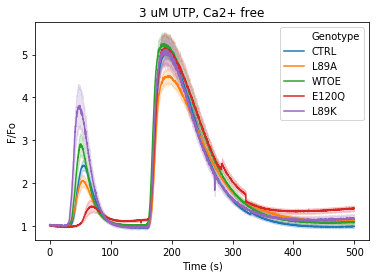

In [16]:
ax = sns.lineplot(x="Time (s)", y="F/Fo", hue="Genotype", ci=95, data=combine_ca_data).set_title('3 uM UTP, Ca2+ free')
sns.plt.xlim(0, 150)


In [6]:
fig = ax.get_figure()
fig.savefig("All")

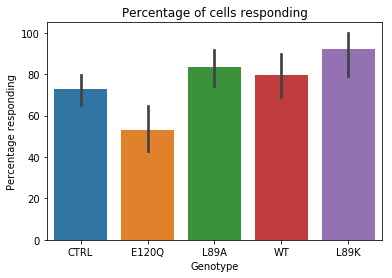

In [7]:
temp = pd.ExcelFile('../assets/combined_response.xlsx')
combined_response = temp.parse("Sheet1")
ax2 = sns.barplot(x = 'Genotype', data=combined_response, y="Percentage responding", ci=95).set_title('Percentage of cells responding')
fig = ax2.get_figure()
fig.savefig("All response")